Source : [Roulette With Monte Carlo](https://medium.datadriveninvestor.com/learning-machine-learning-roulette-with-monte-carlo-policy-db1b3b788230)

In [1]:
import gym
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
env = gym.make('Roulette-v0')
epsilon = 0.01
gamma = 1

In [3]:
Q = {}
agentSumSpace = [i for i in range(0,37)]
actionSpace = [i for i in range(0, 37)]

In [4]:

stateSpace = []
returns = {}
pairsVisited = {}
for total in agentSumSpace:
    for action in actionSpace:
        Q[(total, action)] = 0
        returns[(total, action)] = 0
        pairsVisited[(total, action)] = 0
    stateSpace.append(total)

In [5]:
policy = {}
for state in stateSpace:
    policy[state] = np.random.choice(actionSpace)

In [6]:
numEpisodes = 1000000
for i in range(numEpisodes):
    statesActionsReturns = []
    memory = []
    if i % 100000 == 0:
        print('starting episode', i)
        observation = env.reset()
    done = False
    while not done:
        action = policy[observation]
        observation_, reward, done, info = env.step(action)
        memory.append((observation, action, reward))
        observation = observation_
        memory.append((observation, action, reward))
    G = 0
    last = True
    for observed, action, reward in reversed(memory):
        if last:
            last = False
        else:
            statesActionsReturns.append((observed, action, G))
        G = gamma*G + reward
    statesActionsReturns.reverse()
    statesActionsVisited = []
    for observed, action, G in statesActionsReturns:
        sa = (observed, action)
        if sa not in statesActionsVisited:
            pairsVisited[sa] += 1
            returns[(sa)] += (1 / pairsVisited[(sa)])*(G-returns[(sa)])
            Q[sa] = returns[sa]
            rand = np.random.random()
            if rand < 1 - epsilon:
                state = observed
                values = np.array([Q[(state, a)] for a in actionSpace ])
                best=np.random.choice(np.where(values==values.max())[0])
                policy[state] = actionSpace[best]
            else:
                policy[state] = np.random.choice(actionSpace)
            statesActionsVisited.append(sa)
    if epsilon - 1e-7 > 0:
        epsilon -= 1e-7
    else:
        EPS = 0

starting episode 0
starting episode 100000
starting episode 200000
starting episode 300000
starting episode 400000
starting episode 500000
starting episode 600000
starting episode 700000
starting episode 800000
starting episode 900000


In [7]:
numEpisodes = 1000
rewards = np.zeros(numEpisodes)
totalReward = 0
wins = 0
losses = 0
print('getting ready to test policy')   
for i in range(numEpisodes):
    observation = env.reset()
    done = False
    while not done:
        action = policy[observation]
        observation_, reward, done, info = env.step(action)
        observation = observation_
    totalReward += reward
    rewards[i] = totalReward
    if reward >= 1:
        wins += 1
    elif reward == -1:
        losses += 1

getting ready to test policy


In [8]:
max(rewards)

2.0

win rate 0.491 loss rate 0.509


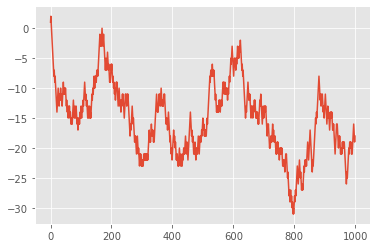

In [9]:
wins /= numEpisodes
losses /= numEpisodes
print('win rate', wins, 'loss rate', losses)
plt.plot(rewards)
plt.show()

# Using Sarsa

![Sarsa Algorythm](sarsa.png)

In [120]:
def create_Q(ns,na,custom=False):
    if custom:
        return np.ones((38,38))
    return np.ones((ns,na))




def sarsa(env,episodes,max_steps,alpha,customQ=False):
    n_state,n_action = env.observation_space.n, env.action_space.n
    # Q = np.ones((n_state,n_action))
    Q = create_Q(n_state,n_action,customQ)
    # print(Q)
    rewards = []
    status = {'Win':0,'Loss':0}
    for episode in range(episodes):
        if episode % 100 == 0:
            print(f"Episode-{episode}")
        total = 0
        state = env.reset()
        action = np.argmax(Q[state,:])
        
        for step in range(max_steps):
            s_next, reward, done, info = env.step(action)
            
            total += reward
            a_next = np.argmax(Q[s_next,:])
            if done:
                Q[state, action] += alpha * ( reward  - Q[state, action] )
                rewards.append(total)
                if total >0:
                    status['Win'] +=1
                else:
                    status['Loss'] +=1
                break
            else:
                Q[state, action] += alpha * ( reward + (gamma * Q[s_next, a_next] ) - Q[state, action] )
            
        state,action = s_next,a_next
        
            
        
    return rewards,Q,status

        


In [122]:
    
def plot_rewards(rewards):    
    plt.plot(rewards,color='tomato')
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.show()

def plot_winLoss(status):
    plt.bar(["Win","Lose"],[status['Win'],status['Loss']],color=['skyblue','tomato'])
    plt.show()


Using Normal Q
Pengulangan ke-1
Episode-0
Episode-100
Episode-200
Episode-300
Episode-400


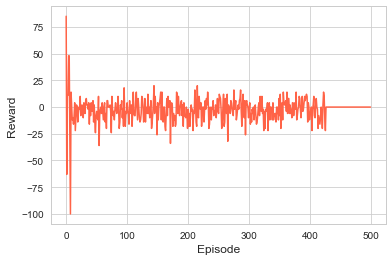

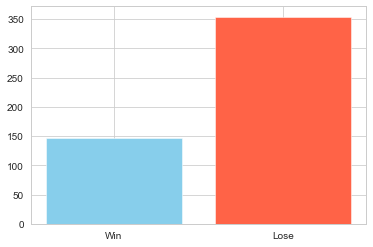

Pengulangan ke-2
Episode-0
Episode-100
Episode-200
Episode-300
Episode-400


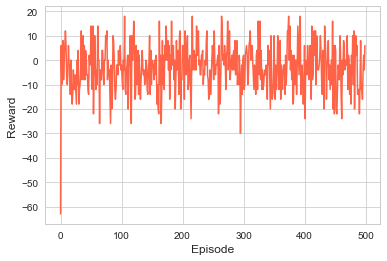

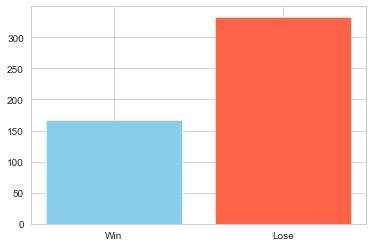

Pengulangan ke-3
Episode-0
Episode-100
Episode-200
Episode-300
Episode-400


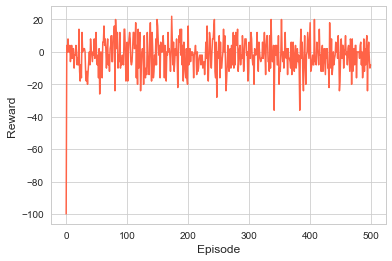

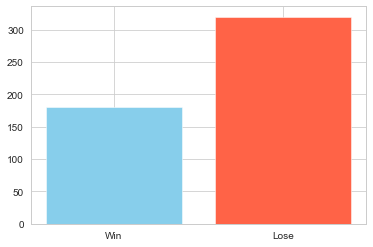

In [123]:


print("Using Normal Q")
for i in range(3):
    print("="*50)
    print(f"Pengulangan ke-{i+1}")
    alpha = 0.4
    gamma = 1
    epsilon = 0.9
    episodes = 500
    max_steps = 2500
    env = gym.make('Roulette-v0')
    rewards,Q,status = sarsa(env,episodes,max_steps,alpha)
    plot_rewards(rewards)
    plot_winLoss(status)



Using Custom Q
Pengulangan ke-1
Episode-0
Episode-100
Episode-200
Episode-300
Episode-400


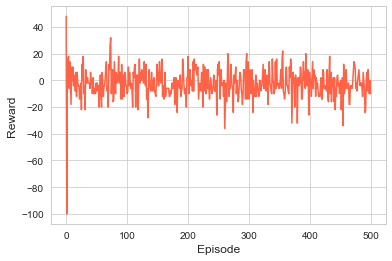

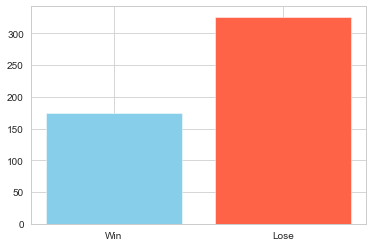

Pengulangan ke-2
Episode-0
Episode-100
Episode-200
Episode-300
Episode-400


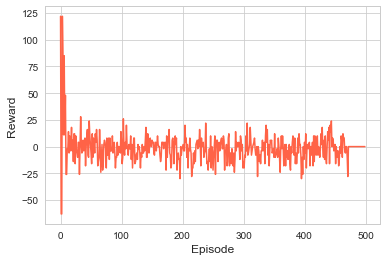

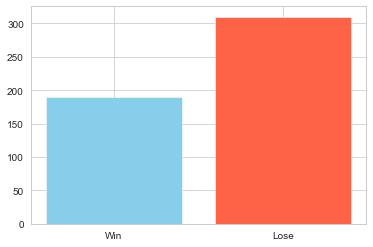

Pengulangan ke-3
Episode-0
Episode-100
Episode-200
Episode-300
Episode-400


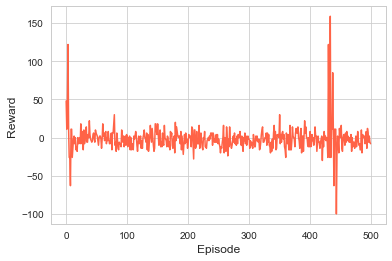

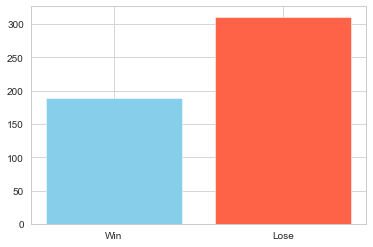

In [124]:
print("Using Custom Q")
for i in range(3):
    print("="*50)
    print(f"Pengulangan ke-{i+1}")
    alpha = 0.4
    gamma = 1
    epsilon = 0.9
    episodes = 500
    max_steps = 2500
    env = gym.make('Roulette-v0')
    rewards,Q,status = sarsa(env,episodes,max_steps,alpha,True)
    plot_rewards(rewards)
    plot_winLoss(status)